In [1]:
# Exercise 1
import numpy as np  

In [2]:
a = np.array([17,6,-5.5,3])  # Define array a
b = np.array([-4.9,1.17,0,2]) # Define array b

print(np.dot(a, b))  # Perform dot product


-70.28000000000002


In [3]:
print(a@b)
a.shape = (4,1) # a matrix with 1 column (a column vector)
b.shape = (4,1) # a matrix with 1 column (a column vector)
print('a shape: ', a)
print('b shape: ',b)
print(b.shape)
print(b.T.shape)


print(a.T@b)
print(float(a.T@b))
print(a@b.T)

-70.28000000000002
a shape:  [[17. ]
 [ 6. ]
 [-5.5]
 [ 3. ]]
b shape:  [[-4.9 ]
 [ 1.17]
 [ 0.  ]
 [ 2.  ]]
(4, 1)
(1, 4)
[[-70.28]]
-70.28000000000002
[[-83.3    19.89    0.     34.   ]
 [-29.4     7.02    0.     12.   ]
 [ 26.95   -6.435   0.    -11.   ]
 [-14.7     3.51    0.      6.   ]]


/var/folders/q4/fmhbs8154p3b5d_cczrb0pd00000gn/T/ipykernel_26956/2571881401.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(a.T@b))


In [4]:
#2. Let t = [−3, 2, 11]T . Compute the cross-product t × t of t and itself. (numpy has a cross-product operation, feel free to implement yours). 
# Let a = [−2,6,1]T. Compute b = t×a and c = a×t. Then compute the inner products tT b and aT b.

t = np.array([-3, 2, 11])
print(np.cross(t, t))
a = np.array([-2, 6, 1])
b = np.cross(t, a)
c = np.cross(a, t)
print(b,'\n', c)
print(np.dot(t, b))
print(np.dot(a, b))

[0 0 0]
[-64 -19 -14] 
 [64 19 14]
0
0


In [5]:
# 3. Write a function that takes a 3D vector t and associates the corresponding matrix ˆt. 
# With t and a from the previous question, compute ˆtt (matrix vector product) as well as ˆta. What do you get?

def td_vec_to_mat(t):
    t1, t2, t3 = t
    return np.array([
        [0, -t3, t2],
        [t3, 0, -t1],
        [-t2, t1, 0]
    ])

t2 = td_vec_to_mat(t)
print(np.dot(t2, t))
print(np.dot(t2, a))


[0 0 0]
[-64 -19 -14]


In [6]:
# 4. For a 3D vector v, the operation v 7→ t×v is linear. So it can be represented by a matrix. Which one?
v = [7, 8, 9]
cross_product = np.cross(t2, v)  
print("t x v:\n", cross_product)


t x v:
 [[-115   14   77]
 [ -24  -78   88]
 [ -27   18    5]]


In [7]:
# 5. Check that ˆtT = −ˆt. Compute ˆt2 = ˆt.ˆt (matrix-matrix product). 
# What is the transpose of ˆt2? What about ˆt3 = ˆt.ˆt.ˆt? You may want first to perform numerical computations in Python!

trans_t = np.transpose(t2)
print('Transposed t: \n', trans_t)
negative_t = -1 * t2
print('Negative t: \n', negative_t)
t2_2 = np.dot(t2, t2)
print('Dot product t.t: \n', t2_2)
trans_t_2 = np.transpose(t2_2)
print('Transpose t.t: \n', trans_t_2)
t3 = np.dot(t2_2, t2)
print('Dot product t^3: \n', t3)

Transposed t: 
 [[  0  11  -2]
 [-11   0  -3]
 [  2   3   0]]
Negative t: 
 [[  0  11  -2]
 [-11   0  -3]
 [  2   3   0]]
Dot product t.t: 
 [[-125   -6  -33]
 [  -6 -130   22]
 [ -33   22  -13]]
Transpose t.t: 
 [[-125   -6  -33]
 [  -6 -130   22]
 [ -33   22  -13]]
Dot product t^3: 
 [[    0  1474  -268]
 [-1474     0  -402]
 [  268   402     0]]


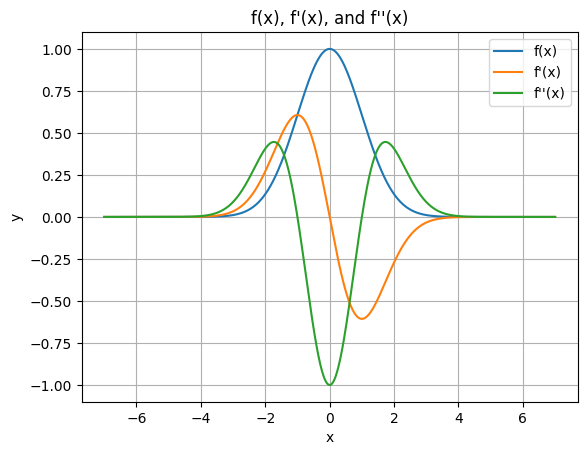

In [8]:
# 3. Plot on the same graph f(x), f′(x) and f′′(x), say for x ∈ [−7,7] (easy with Python’s matplotlib).
import matplotlib.pyplot as plt


x = np.linspace(-7, 7, 500)
f = np.exp(-x**2 / 2)
f_prime = -x * np.exp(-x**2 / 2)
f_double_prime = (x**2 - 1) * np.exp(-x**2 / 2)


plt.plot(x, f, label="f(x)")
plt.plot(x, f_prime, label="f'(x)")
plt.plot(x, f_double_prime, label="f''(x)")
plt.legend()
plt.title("f(x), f'(x), and f''(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


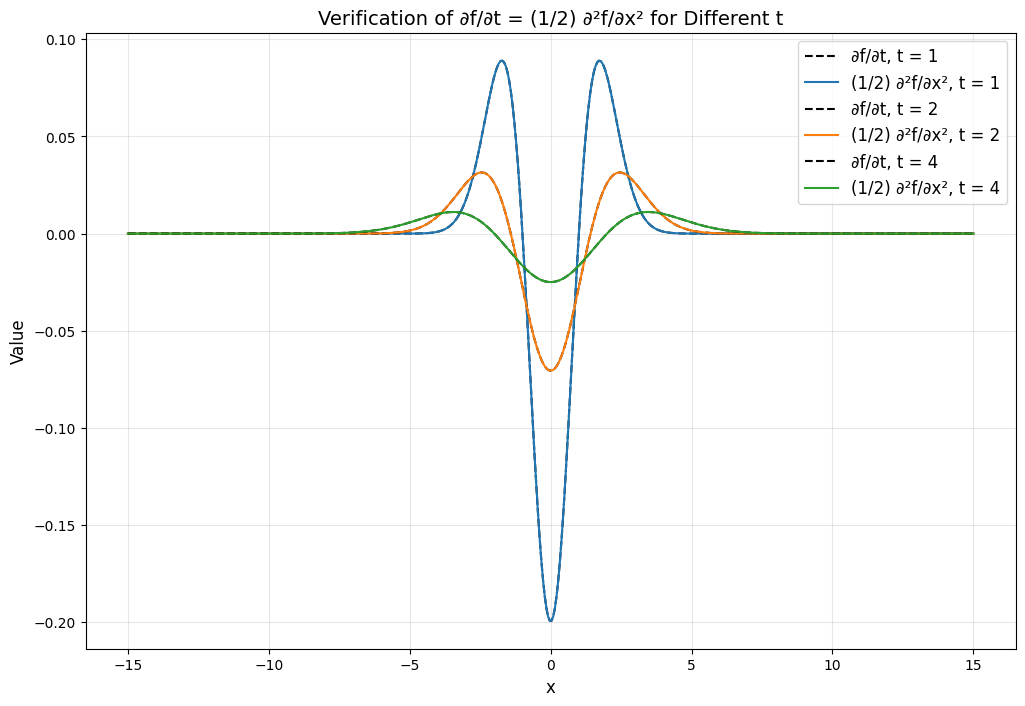

In [9]:
# 10. Plot these functions for t = 1, 2, 4, with x ∈ [−15, 15].
x = np.linspace(-15, 15, 500)
t_values = [1, 2, 4]


def df_dt(x, t):
    return (1 / np.sqrt(2 * np.pi * t)) * np.exp(-x**2 / (2 * t)) * (-1 / (2 * t) + x**2 / (2 * t**2))


def d2f_dx2(x, t):
    return (1 / np.sqrt(2 * np.pi * t)) * np.exp(-x**2 / (2 * t)) * (-1 / t + x**2 / t**2)


def lhs(x, t):
    return df_dt(x, t)

def rhs(x, t):
    return 0.5 * d2f_dx2(x, t)


plt.figure(figsize=(12, 8))
for t in t_values:
    plt.plot(x, lhs(x, t), label=f'∂f/∂t, t = {t}', linestyle='--', color='k')
    plt.plot(x, rhs(x, t), label=f'(1/2) ∂²f/∂x², t = {t}')


plt.title('Verification of ∂f/∂t = (1/2) ∂²f/∂x² for Different t', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()
